<a href="https://colab.research.google.com/github/Sachit54/AI-and-DS/blob/main/Logistic_Regression_ipnyb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Number of customers
n_customers = 500

ages = np.random.randint(18, 70, n_customers)
genders = np.random.randint(0, 2, n_customers)
income = np.random.normal(50, 15, n_customers)
purchase_freq = np.random.poisson(3, n_customers)

churn =((income < 40) & (purchase_freq < 3)).astype(int)

df_customers = pd.DataFrame({
    'Age': ages,
    'Gender': genders,
    'Income': income,
    'PurchaseFrequency': purchase_freq,
    'Churn': churn
})

df_customers.to_csv("customers.csv", index=False)

print("Customer data created and saved to 'customers.csv'")
print(df_customers.head())

Customer data created and saved to 'customers.csv'
   Age  Gender     Income  PurchaseFrequency  Churn
0   56       1  24.449263                  2      1
1   69       0  49.166785                  2      0
2   46       0  55.760982                  4      0
3   32       1  49.509579                  4      0
4   60       0  18.988368                  1      1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df=pd.read_csv("customers.csv")
df.head()

,Age,Gender,Income,PurchaseFrequency,Churn
0,56,1,24.449263,2,1
1,69,0,49.166785,2,0
2,46,0,55.760982,4,0
3,32,1,49.509579,4,0
4,60,0,18.988368,1,1


In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                500 non-null    int64  
 1   Gender             500 non-null    int64  
 2   Income             500 non-null    float64
 3   PurchaseFrequency  500 non-null    int64  
 4   Churn              500 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 19.7 KB


,0
Age,0
Gender,0
Income,0
PurchaseFrequency,0
Churn,0


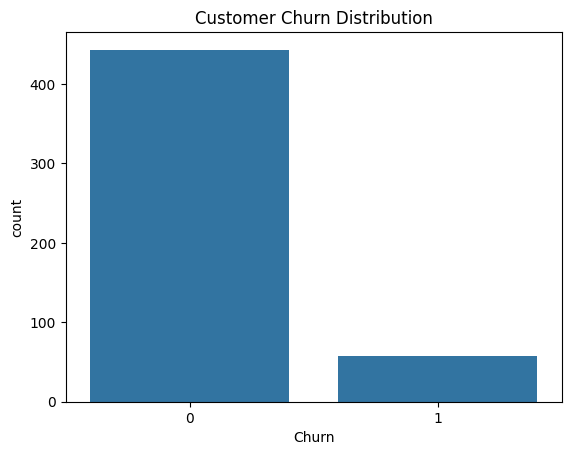

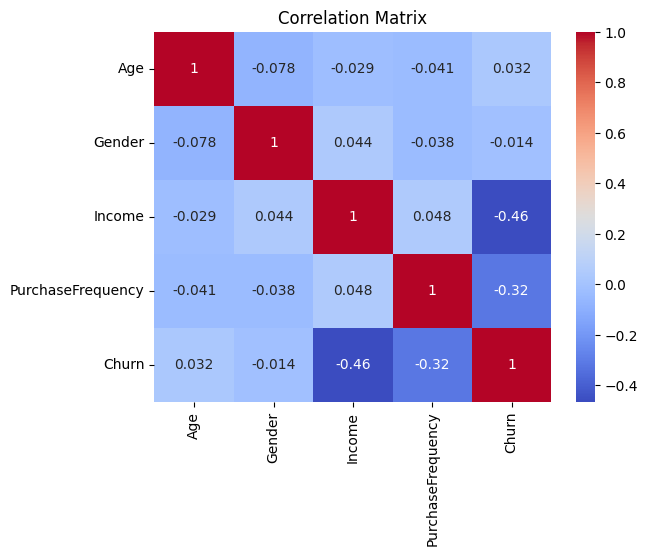

In [ ]:
sns.countplot(data=df, x='Churn')
plt.title("Customer Churn Distribution")
plt.show()

sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
x=df.drop('Churn', axis=1)
y=df['Churn']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
model=LogisticRegression()
model.fit(x_train, y_train)



LogisticRegression()

Accuracy Score  0.91
Confusion Matrix:
 [[85  2]
 [ 7  6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95        87
           1       0.75      0.46      0.57        13

    accuracy                           0.91       100
   macro avg       0.84      0.72      0.76       100
weighted avg       0.90      0.91      0.90       100



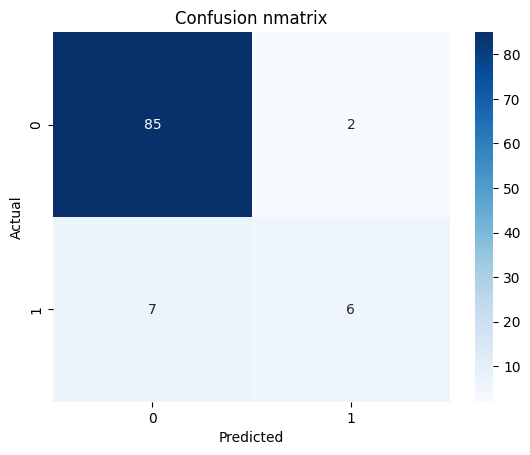

In [ ]:
y_pred=model.predict(x_test)
print("Accuracy Score ",accuracy_score(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",cm)
print("Classification Report:\n",classification_report(y_test,y_pred))

sns.heatmap(cm,annot=True,fmt='d',cmap="Blues")
plt.title("Confusion nmatrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

df=pd.read_csv("customers.csv")
df.head()

,Age,Gender,Income,PurchaseFrequency,Churn
0,56,1,24.449263,2,1
1,69,0,49.166785,2,0
2,46,0,55.760982,4,0
3,32,1,49.509579,4,0
4,60,0,18.988368,1,1
